### Cost Benefit Questions

1. How would you rephrase the business problem if your model was optimizing toward _precision_? i.e., How might the model behave differently, and what effect would if have?
2. How would you rephrase the business problem if your model was optimizing toward _recall_?
3. What would the most ideal model look like in this case?

### Visualizing models over variables

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../assets/dataset/collegeadmissions.csv')

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df = df.join(pd.get_dummies(df['rank'], prefix='rank'))
model = lm.LogisticRegression()
model.fit(df[['rank', 'gre']], df['admit'])

df['probability'] = model.predict_proba(df[['rank', 'gre']]).T[1]

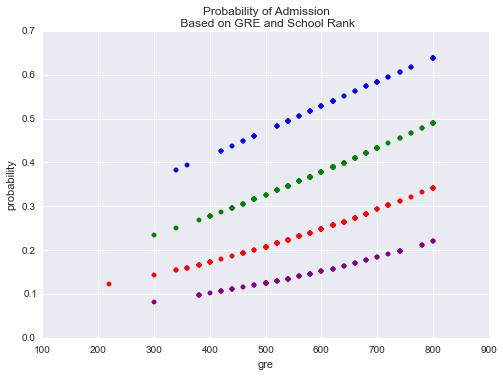

In [5]:
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df[df['rank'] == e+1].plot(x='gre', y='probability', kind='scatter', color = c, ax=ax)

    
ax.set(title='Probability of Admission\n Based on GRE and School Rank')

### Other Answers: visualizing GPA and rank; visualizing the inverse

Use this space to work on visualizing GPA and rank, and an example of where admit=0.

### Visualizing Performance Against Baseline

#### Visualizing AUC and comparing Models

In [8]:
from sklearn import dummy, metrics

In [9]:
model0 = dummy.DummyClassifier()
model0.fit(df[['rank']], df['admit'])
df['probability_0'] = model0.predict_proba(df[['rank']]).T[1]

model1 = lm.LogisticRegression()
model1.fit(df[['rank']], df['admit'])
df['probability_1'] = model1.predict_proba(df[['rank']]).T[1]

model2 = lm.LogisticRegression()
model2.fit(df[['rank', 'gpa']], df['admit'])
df['probability_2'] = model2.predict_proba(df[['rank', 'gpa']]).T[1]

model3 = lm.LogisticRegression()
model3.fit(df[['rank', 'gpa', 'gre']], df['admit'])
df['probability_3'] = model3.predict_proba(df[['rank', 'gpa', 'gre']]).T[1]

 (0, 1),
 (0, 1),

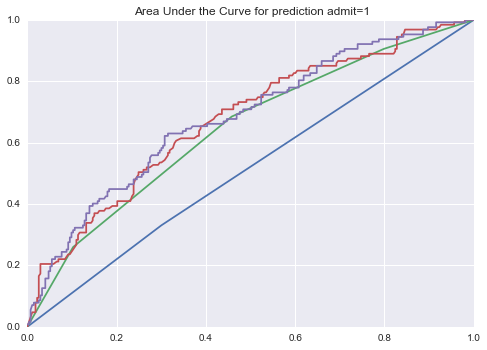

In [10]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.admit, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.admit, df.probability_1)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.admit, df.probability_2)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(df.admit, df.probability_3)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for prediction admit=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

#### Visualizing Precision / Recall (with cleaner code)

Things to try / pay attention to:

1. The result set from `precision_recall_curve()` are inverted (comparted to `roc_curve`) for plotting, so you'll have to use item [1] for X, and item [0] for y.
2. The code from above could be better organized since it is an additive approach to building the model. There's some starter code below to process the steps (or take a different approach).

In [13]:
features = ['rank', 'gpa', 'gre']

model0 = dummy.DummyClassifier()
model0.fit(df[features[0]], df['admit'])
df['probability_0'] = model0.predict_proba(df[['rank']]).T[1]

for e, _ in enumerate(features):
    # this code should create a model object, fit it, and add a probablity series to the DataFrame.
    # Consider adding in cross validation too.


 (0, 1),
 (0, 1),

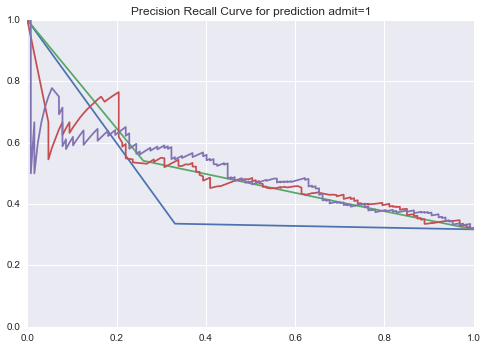

In [12]:
ax = plt.subplot(111)
for i in range(4):
    # this code can loop through your probability_ columns to build the matplotlib figure.

ax.set(title='Precision Recall Curve for prediction admit=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

### Bonus

Try comparing AUC and precision recall curves to an optimized KNN model. Make comparisons to logistic regression--they should be more obvious, even given the same feature set. 